<a href="https://colab.research.google.com/github/dhairyachandra/KDM_Spring_2021/blob/main/ICP_10/KDM_ICP10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Given Code


**Import All Required Packages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Download Dataset**

In [3]:
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/sentiment_analysis_tutorial/women_clothing_review.csv

--2021-04-12 19:24:55--  https://raw.githubusercontent.com/towardsai/tutorials/master/sentiment_analysis_tutorial/women_clothing_review.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8480236 (8.1M) [text/plain]
Saving to: ‘women_clothing_review.csv’

women_clothing_revi 100%[===================>]   8.09M  29.8MB/s    in 0.3s    

2021-04-12 19:24:55 (29.8 MB/s) - ‘women_clothing_review.csv’ saved [8480236/8480236]



**Read data from csv**

In [4]:
df = pd.read_csv('women_clothing_review.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.shape

(23486, 11)

**Drop unnecessary columns**

In [6]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)
print(df.shape)
df

(22628, 8)


,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses
...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,General Petite,Dresses,Dresses
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,General Petite,Tops,Knits
23483,1104,31,"This fit well, but the top was very see throug...",3,0,General Petite,Dresses,Dresses
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,General,Dresses,Dresses


**Calculation of Polarity**


In [7]:
df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity_Rating
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutral
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive


**Plot the Rating visualization graph**

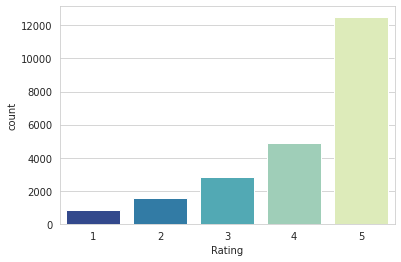

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=df, palette='YlGnBu_r')

**Plot the Polarity Rating count**

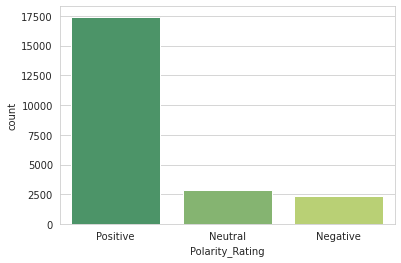

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

**Data Preprocessing**

In [10]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

In [11]:
df_Positive.shape


(8000, 9)

In [12]:
df_Neutral.shape

(2823, 9)

In [13]:
df_Negative.shape

(2370, 9)

**Sample negative and neutral polarity dataset and create final dataframe**

pandas.sample() function returns the sample from the data and when the replace = True it allows sampling of the same row more than once  

In [31]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)


In [32]:
df_Neutral_over.shape

(8000, 9)

In [33]:
df_Negative_over.shape

(8000, 9)

In [34]:
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

In [35]:
df.shape

(24000, 9)

**Text Preprocessing**

In [36]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [37]:
df['review'] = df['Review Text'].apply(get_text_processing)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity_Rating,review
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive,Absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,Love dress sooo pretty happened find store im ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flattering due adjustable front tie perf...
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...


**Visualize Text Review with Polarity Rating**

In [38]:
df = df[['review', 'Polarity_Rating']]
df.head()

,review,Polarity_Rating
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dress sooo pretty happened find store im ...,Positive
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
6,aded basket hte last mintue see would look lik...,Positive


**Apply One hot encoding on negative, neutral, and positive**

In [39]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,Negative,Neutral,Positive
0,Absolutely wonderful silky sexy comfortable,0,0,1
1,Love dress sooo pretty happened find store im ...,0,0,1
3,love love love jumpsuit fun flirty fabulous ev...,0,0,1
4,shirt flattering due adjustable front tie perf...,0,0,1
6,aded basket hte last mintue see would look lik...,0,0,1


**Apply Train Test Split**

In [40]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
X_train

array(['Nice weight sweater allows one wear leggings ultra skinny jeans without looking like im pregnant theres anything wrong feminine light weight enough wear cami underneath pretty scarf',
       'generally dont spend much jeans wanted nice black pair rolled dice sale wear im average size 12 struggled get size 32s hips buttoned zipped looked like stuffed black sausage best thin frames even size',
       'pretty provides coverage bit support wearing around house im 34b ordered small still room tightened straps used tightest hooks back makes fit ok bought wear home since expecting great deal support shaping feels ok supercomfy bit scratchy around edges going buy another color loved keep one',
       ...,
       'Although may look like takes shape wonderfully flattering jumper intrigued seeing catalog try store unsure middle would appear fit wonderfully feminine looking forward summer',
       'beautiful pants especially walk simply beautiful flow nicely however soooo long 5 5 12 even 

In [42]:
y_train

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

**Apply vectorization**

In [43]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [44]:
X_train

<16800x12657 sparse matrix of type '<class 'numpy.int64'>'
	with 454587 stored elements in Compressed Sparse Row format>

**Apply frequency, inverse document frequency:**

In [45]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [46]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Build a deep learning model and add different layers**

In [47]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

**Fit the Model**

In [30]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
66/66 [==============================] - 11s 110ms/step - loss: 0.8039 - accuracy: 0.5947 - val_loss: 0.3420 - val_accuracy: 0.8775
Epoch 2/100
66/66 [==============================] - 7s 102ms/step - loss: 0.1222 - accuracy: 0.9610 - val_loss: 0.2649 - val_accuracy: 0.9160
Epoch 3/100
66/66 [==============================] - 7s 103ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.3611 - val_accuracy: 0.9132
Epoch 4/100
66/66 [==============================] - 7s 103ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.4080 - val_accuracy: 0.9124
Epoch 00004: early stopping


**Evaluation of Model**

In [31]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

113/113 [==============================] - 1s 9ms/step - loss: 0.4080 - accuracy: 0.9124
Test accuracy: 0.9123610854148865


**Prediction**

In [32]:
preds = model.predict(X_test)
preds

array([[2.9824039e-11, 9.2037880e-09, 1.0000000e+00],
       [9.9533987e-01, 3.1801218e-03, 1.4800178e-03],
       [9.9994743e-01, 9.9230328e-06, 4.2625492e-05],
       ...,
       [9.9921238e-01, 7.7423661e-05, 7.1017834e-04],
       [4.4690096e-09, 1.2987793e-08, 1.0000000e+00],
       [1.3292291e-07, 2.1982653e-06, 9.9999762e-01]], dtype=float32)

# ICP

### Task 1: Changing the test/train ratio

In [33]:
# Changed the test size to 20%

X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)


model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

preds = model.predict(X_test)
preds

Epoch 1/100
75/75 [==============================] - 8s 106ms/step - loss: 0.7829 - accuracy: 0.6174 - val_loss: 0.2899 - val_accuracy: 0.8910
Epoch 2/100
75/75 [==============================] - 8s 103ms/step - loss: 0.1075 - accuracy: 0.9642 - val_loss: 0.2287 - val_accuracy: 0.9281
Epoch 3/100
75/75 [==============================] - 8s 103ms/step - loss: 0.0194 - accuracy: 0.9946 - val_loss: 0.2988 - val_accuracy: 0.9281
Epoch 4/100
75/75 [==============================] - 8s 102ms/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.3871 - val_accuracy: 0.9233
Epoch 00004: early stopping
75/75 [==============================] - 1s 9ms/step - loss: 0.3871 - accuracy: 0.9233
Test accuracy: 0.9233333468437195


array([[3.6589282e-12, 8.4669477e-10, 1.0000000e+00],
       [9.9111825e-01, 7.8103077e-03, 1.0713390e-03],
       [9.9997628e-01, 4.3936975e-06, 1.9261142e-05],
       ...,
       [8.2645712e-09, 5.5550654e-06, 9.9999440e-01],
       [1.0302810e-10, 2.5999525e-09, 1.0000000e+00],
       [1.5228170e-07, 9.9998367e-01, 1.6210102e-05]], dtype=float32)

### Task 2: Adding and Dropping the layers

In [34]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

# Adding extra layer

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)


model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

preds = model.predict(X_test)
preds

Epoch 1/100
66/66 [==============================] - 8s 108ms/step - loss: 1.1227 - accuracy: 0.3336 - val_loss: 1.1047 - val_accuracy: 0.3340
Epoch 2/100
66/66 [==============================] - 7s 104ms/step - loss: 1.1061 - accuracy: 0.3266 - val_loss: 1.0997 - val_accuracy: 0.3340
Epoch 3/100
66/66 [==============================] - 7s 104ms/step - loss: 1.0993 - accuracy: 0.3380 - val_loss: 1.0987 - val_accuracy: 0.3340
Epoch 4/100
66/66 [==============================] - 7s 103ms/step - loss: 1.0990 - accuracy: 0.3296 - val_loss: 1.0986 - val_accuracy: 0.3340
Epoch 5/100
66/66 [==============================] - 7s 103ms/step - loss: 1.0986 - accuracy: 0.3342 - val_loss: 1.0987 - val_accuracy: 0.3340
Epoch 6/100
66/66 [==============================] - 7s 104ms/step - loss: 1.0986 - accuracy: 0.3373 - val_loss: 1.0987 - val_accuracy: 0.3276
Epoch 00006: early stopping
113/113 [==============================] - 1s 9ms/step - loss: 1.0987 - accuracy: 0.3276
Test accuracy: 0.32763889

array([[0.3308528 , 0.3334342 , 0.33571303],
       [0.3308528 , 0.3334342 , 0.33571303],
       [0.3308528 , 0.3334342 , 0.33571303],
       ...,
       [0.3308528 , 0.3334342 , 0.33571303],
       [0.3308528 , 0.3334342 , 0.33571303],
       [0.3308528 , 0.3334342 , 0.33571303]], dtype=float32)

In [35]:
# Decreasing the number of layers

model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)


model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

preds = model.predict(X_test)
preds

Epoch 1/100
66/66 [==============================] - 7s 106ms/step - loss: 0.7569 - accuracy: 0.6358 - val_loss: 0.3251 - val_accuracy: 0.8858
Epoch 2/100
66/66 [==============================] - 7s 103ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.2795 - val_accuracy: 0.9124
Epoch 3/100
66/66 [==============================] - 7s 103ms/step - loss: 0.0165 - accuracy: 0.9965 - val_loss: 0.3445 - val_accuracy: 0.9119
Epoch 4/100
66/66 [==============================] - 7s 103ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.3702 - val_accuracy: 0.9132
Epoch 00004: early stopping
113/113 [==============================] - 1s 9ms/step - loss: 0.3702 - accuracy: 0.9132
Test accuracy: 0.9131944179534912


array([[6.6770950e-10, 1.2194408e-06, 9.9999881e-01],
       [8.3435410e-01, 1.5975511e-01, 5.8907545e-03],
       [9.9982482e-01, 2.5142530e-05, 1.5007672e-04],
       ...,
       [9.9962413e-01, 1.5498543e-05, 3.6029975e-04],
       [9.3019895e-07, 1.2757941e-06, 9.9999774e-01],
       [1.5828830e-07, 3.6786203e-06, 9.9999619e-01]], dtype=float32)

### Task 3: Changing the dropout ratio to 0.9

In [31]:
model = Sequential()

# Changed the dropout ratio

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)


model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)


model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

preds = model.predict(X_test)
preds

Epoch 1/100
66/66 [==============================] - 7s 105ms/step - loss: 1.1323 - accuracy: 0.3462 - val_loss: 1.0720 - val_accuracy: 0.5589
Epoch 2/100
66/66 [==============================] - 7s 102ms/step - loss: 1.0102 - accuracy: 0.4551 - val_loss: 0.7124 - val_accuracy: 0.6544
Epoch 3/100
66/66 [==============================] - 7s 103ms/step - loss: 0.7182 - accuracy: 0.6520 - val_loss: 0.6192 - val_accuracy: 0.7362
Epoch 4/100
66/66 [==============================] - 7s 103ms/step - loss: 0.5897 - accuracy: 0.7406 - val_loss: 0.5085 - val_accuracy: 0.8136
Epoch 5/100
66/66 [==============================] - 7s 105ms/step - loss: 0.4520 - accuracy: 0.8239 - val_loss: 0.4182 - val_accuracy: 0.8597
Epoch 6/100
66/66 [==============================] - 7s 105ms/step - loss: 0.3371 - accuracy: 0.8737 - val_loss: 0.3558 - val_accuracy: 0.8892
Epoch 7/100
66/66 [==============================] - 7s 104ms/step - loss: 0.2329 - accuracy: 0.9204 - val_loss: 0.3211 - val_accuracy: 0.9032

array([[5.7054574e-14, 2.7527163e-08, 1.0000000e+00],
       [9.9617612e-01, 3.7442455e-03, 7.9524849e-05],
       [9.9994302e-01, 5.6885554e-05, 7.1847452e-08],
       ...,
       [9.9997199e-01, 2.8012868e-05, 2.6463598e-08],
       [4.5750438e-11, 4.1048625e-07, 9.9999964e-01],
       [1.4247131e-10, 1.6829703e-06, 9.9999833e-01]], dtype=float32)

### Task 4: Reduce the sampling of negative and neutral tweets

In [17]:
# Reduced value to 5000 from 1000

df_Neutral_over = df_Neutral.sample(1000, replace=True)
df_Negative_over = df_Negative.sample(1000, replace=True)

df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)
df.shape

(10000, 9)

In [30]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

preds = model.predict(X_test)
preds

Epoch 1/100
28/28 [==============================] - 8s 180ms/step - loss: 0.6817 - accuracy: 0.7741 - val_loss: 0.4261 - val_accuracy: 0.8037
Epoch 2/100
28/28 [==============================] - 4s 157ms/step - loss: 0.3445 - accuracy: 0.8136 - val_loss: 0.4154 - val_accuracy: 0.8407
Epoch 3/100
28/28 [==============================] - 4s 156ms/step - loss: 0.2399 - accuracy: 0.8942 - val_loss: 0.5117 - val_accuracy: 0.8543
Epoch 4/100
28/28 [==============================] - 4s 157ms/step - loss: 0.0914 - accuracy: 0.9745 - val_loss: 0.6751 - val_accuracy: 0.8397
Epoch 00004: early stopping
47/47 [==============================] - 1s 19ms/step - loss: 0.6751 - accuracy: 0.8397
Test accuracy: 0.8396666646003723


array([[6.32985400e-11, 6.89850310e-07, 9.99999285e-01],
       [1.07065225e-05, 2.16048351e-03, 9.97828782e-01],
       [3.37494793e-03, 1.60295084e-01, 8.36329997e-01],
       ...,
       [4.55040038e-07, 1.90220540e-04, 9.99809325e-01],
       [9.94203055e-24, 9.36447016e-16, 1.00000000e+00],
       [2.95226425e-16, 4.30190883e-11, 1.00000000e+00]], dtype=float32)

### Task 5: Change the batch size

In [48]:
# Reduced the batch size to 128

model.fit(x=X_train, y=y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

preds = model.predict(X_test)
preds

Epoch 1/100
132/132 [==============================] - 17s 126ms/step - loss: 0.7600 - accuracy: 0.6314 - val_loss: 0.3328 - val_accuracy: 0.8806
Epoch 2/100
132/132 [==============================] - 16s 123ms/step - loss: 0.1170 - accuracy: 0.9613 - val_loss: 0.2802 - val_accuracy: 0.9149
Epoch 3/100
132/132 [==============================] - 16s 123ms/step - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.3662 - val_accuracy: 0.9160
Epoch 4/100
132/132 [==============================] - 16s 124ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.3991 - val_accuracy: 0.9186
Epoch 00004: early stopping
113/113 [==============================] - 3s 22ms/step - loss: 0.3991 - accuracy: 0.9186
Test accuracy: 0.9186111092567444


array([[7.4045440e-12, 4.8287491e-10, 1.0000000e+00],
       [9.9992275e-01, 4.8921764e-05, 2.8405348e-05],
       [9.9996364e-01, 3.5104949e-06, 3.2872715e-05],
       ...,
       [1.0000000e+00, 6.7116321e-09, 1.3141088e-08],
       [1.3525757e-09, 3.2285730e-09, 1.0000000e+00],
       [9.6041823e-09, 3.0066314e-08, 1.0000000e+00]], dtype=float32)